---
title: 'Essential Tools: Pandas'
jupyter: python3
code-fold: false
---

::: {.content-visible when-profile="web"}
## Introduction

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tools4ds/DS701-Course-Notes/blob/main/ds701_book/jupyter_notebooks/02B-Pandas.ipynb)

In this lecture we discuss one of most useful Python packages for data 
science -- Pandas.

We'll touch on some highlights here, but to learn more, start with the
[Pandas Getting started tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)
:::

## Pandas

::: {.incremental}

- [Pandas](https://pandas.pydata.org/docs/index.html) is a Python library for data
manipulation and analysis with an emphasis on tabular data. 
- It can be used to produce high quality plots and integrates nicely with other
  libraries that expect NumPy arrays. 
- Knowledge and use of Pandas is essential as a data scientist.
:::

:::: {.fragment}
The most important data structure provided by Pandas is the `DataFrame`
implemented in the 
[DataFrame](https://pandas.pydata.org/docs/reference/frame.html) class. 
::::

:::: {.fragment}
Unlike a numpy array, a `DataFrame` can have columns of different types.
::::

:::: {.fragment}
Make it a habit that when you're given a tabular dataset, load it into a `DataFrame`.
::::

## Fetching, storing and retrieving your data

We'll work with stock data. A popular python package for this is `yfinance`, but
there seems to be some access rate limits which make it more difficult to use.

Instead we'll manually download a CSV file:

    MANUAL DOWNLOAD FROM WALL STREET JOURNAL:
    
    1. Go to: https://www.wsj.com/market-data/quotes/NVDA/historical-prices
    2. Set date range: January 1, 2024 to December 31, 2024
    3. Click "Download" button
    4. Save the CSV file
    5. Load in Python:

In [1]:
import pandas as pd

try:
    nvidia_stocks = pd.read_csv('data/stocks/nvidia_stock_2024.csv', index_col=0)
except FileNotFoundError:
    url = 'https://raw.githubusercontent.com/tools4ds/DS701-Course-Notes/main/ds701_book/data/stocks/nvidia_stock_2024.csv'
    nvidia_stocks = pd.read_csv(url, index_col=0)

nvidia_stocks = nvidia_stocks.sort_index()

---

It's important to inspect the data you are working with and Pandas provides a
variety of methods to do so such as `.head()`, `.tail()`, `.info()`,
`.describe()`, etc.

In [ ]:
#| code-fold: false
nvidia_stocks.head()

Notice how each row has a label and each column has a label.

---

A DataFrame is a python object that has many associated methods to explore and
manipulate the data.

The method `.info()` gives you a description of the dataframe.

In [ ]:
nvidia_stocks.info()

---

The method `.describe()` gives you summary statistics of the dataframe.

In [ ]:
nvidia_stocks.describe()

## Writing/Reading to/from a ``.csv`` file

Pandas can read and write dataframes with many file formats such as `.csv`, `.json`, `.parquet`,
`.xlsx`, `.html`, `SQL`, etc.

Here we write the dataframe to a `.csv` file.

In [ ]:
nvidia_stocks.to_csv('nvidia_data.csv')

We can escape a shell command using the `!` operator to see the top of the file.

In [ ]:
!head nvidia_data.csv

---

And of course we can likewise read a `.csv` file into a dataframe.  This is probably the most common way you will get data into Pandas.

In [ ]:
df = pd.read_csv('nvidia_data.csv')
df.head()

::: {.callout-caution}
But be careful, the index column is not automatically set.
:::

In [ ]:
df.info()

Note the index description.

---

To set the index column, we can use the `index_col` parameter.

In [ ]:
df = pd.read_csv('nvidia_data.csv', index_col=0)
df.info()

## Working with data columns

In general, we'll typically describe the rows in the dataframe as **items** 
(or **observations** or **data samples**) and the columns as **features**.

In [ ]:
df.columns

Pandas allows you to reference a column similar to a python dictionary key,
using column names in square brackets.

In [ ]:
df['Open']

Note that this returns a `Series` object, the other fundamental data structure in Pandas.

In [ ]:
type(df['Open'])

Also note that Series is indexed in this case by dates rather than simple integers.

---

Pandas also allows you to refer to columns using an object attribute syntax.

Note that the column name cannot include a space in this case.

In [ ]:
df.Open

---

You can select a list of columns:

In [ ]:
df[['Open', 'Close']].head()

Which is just another dataframe, which is why we can chain the `.head()` method.

In [ ]:
type(df[['Open', 'Close']])

---

Changing column names is as simple as assigning to the `.columns` property.

Let's adjust the column names to remove spaces.

In [ ]:
new_column_names = [x.lower().replace(' ', '_') for x in df.columns]
df.columns = new_column_names
df.info()

Observe that we first created a list of column names without spaces using __list comprehension__. This is the pythonic way to generate a new list.

Now **all** columns can be accessed using the **dot** notation.


## A sampling of DataFrame methods.

There are many useful methods in the DataFrame object. It is important to
familiarize yourself with these methods.

The following methods calculate the mean, standard deviation, and median of the specified numeric columns.

In [ ]:
df.mean()

or we can give a list of columns to the Dataframe object:

In [ ]:
df[['open', 'close', 'volume']].mean()

In [ ]:
df.std()

In [ ]:
df.median()

Or apply the method to a single column:

In [ ]:
df.open.mean()

In [ ]:
df.high.mean()

## Plotting methods

Pandas also wraps `matplotlib` and provides a variety of easy-to-use plotting
functions directly from the dataframe object.

These are your "first look" functions and useful in exploratory data analysis.

Later, we will use more specialized graphics packages to create more
sophisticated visualizations.

In [ ]:
import matplotlib.pyplot as plt

df.high.plot(label='High')
df.low.plot(label='Low')
plt.title('NVIDIA Stock Price')
plt.ylabel('Dollars')
plt.legend(loc='best')
plt.show()

---

Or a histogram on the adjusted closing price.

In [ ]:
df.close.hist()
plt.xlabel('Closing Price')
plt.ylabel('Dollars')
plt.title('NVIDIA Stock Price')
plt.show()

## Accessing rows of the DataFrame

So far we've seen how to access a column of the DataFrame. To access a row we use different syntax.

To access a row by its index label, use the **`.loc()`** method ('location').

In [ ]:
df.loc['01/02/24']

As a tangent, we can use the `.apply()` method to format the output.

In [ ]:
df.loc['01/02/24'].apply(lambda x: '{:,.2f}'.format(x) if isinstance(x, (int, float)) else x)

---

To access a row by its index number (i.e., like an array index), use **`.iloc()`** ('integer location')

In [ ]:
df.iloc[0, :]

and similarly formatted:

In [ ]:
df.iloc[0, :].apply(lambda x: '{:,.2f}'.format(x) if isinstance(x, (int, float)) else x)

---

To iterate over the rows you can use **`.iterrows()`**.

In [ ]:
num_positive_days = 0
for idx, row in df.iterrows():
    if row.close > row.open:
        num_positive_days += 1

print(f"The total number of positive-gain days is {num_positive_days} out of {len(df)} days or as percentage {num_positive_days/len(df):.2%}")

::: {.callout-note}
This is only capturing the intraday gain/loss, not the cumulative inter-day gain/loss.
:::

## Filtering

It is easy to select rows from the data.  

All the operations below return a new Series or DataFrame, which itself can be
treated the same way as all Series and DataFrames we have seen so far.

In [ ]:
tmp_high = df.high > 100
tmp_high.tail()

Summing a Boolean array is the same as counting the number of `True` values.

In [ ]:
sum(tmp_high)

---

Now, let's select only the rows of `df` that correspond to `tmp_high`. 

::: {.callout-note}
We can pass a series to the dataframe to select rows.
:::

In [ ]:
df[tmp_high]

---

Putting it all together, we can count the number of positive days without iterating over the rows.

In [ ]:
positive_days = df[df.close > df.open]
print(f"Total number of positive-gain days is {len(positive_days)}")
positive_days.head()

---

Or count the number of days with a gain of more than $2.

In [ ]:
very_positive_days = df[(df.close - df.open) > 2]
print(f"Total number of days with gain > $2 is {len(very_positive_days)}")
very_positive_days.head()

Note that this doesn't the explain the total gain for the year. Why?

## Creating new columns

To create a new column, simply assign values to it. The column name is similar to a key in a dictionary.

Let's look at the daily change in closing price.

In [ ]:
# Calculate the daily change in closing price
df['daily_change'] = df['close'].diff()

# Create the cumulative profit column
df['cum_profit'] = df['daily_change'].cumsum()

# Display the first few rows to verify the new column
print(df[['close', 'daily_change', 'cum_profit']].head())

It is convenient that `.diff()` by default is the difference between the current and previous row.

---

Let's look at the histogram of the daily change in stock price.

In [ ]:
# Plot histogram of daily_change
plt.figure(figsize=(10, 6))
df['daily_change'].hist(bins=50, edgecolor='black')
plt.title('Histogram of Daily Change in Stock Price')
plt.xlabel('Daily Change')
plt.ylabel('Frequency')
plt.show()

---

Let's give each row a `gain` value as a categorical variable.

In [ ]:
for idx, row in df.iterrows():
    if row.daily_change < 0:
        df.loc[idx,'cat_gain']='negative'
    elif row.daily_change < 1:
        df.loc[idx,'cat_gain']='small_gain'
    elif row.daily_change < 2:
        df.loc[idx,'cat_gain']='medium_gain'
    elif row.daily_change >= 2:
        df.loc[idx,'cat_gain']='large_gain'
df.head()

---

Here is another, more "functional", way to accomplish the same thing.

First, let's drop the gain column so we can start fresh.

In [ ]:
df.drop('cat_gain', axis=1, inplace=True)
df.head()

---

Define a function that classifies rows, and `apply` it to each row.

In [ ]:
def namerow(row):
    if row.daily_change < 0:
        return 'negative'
    elif row.daily_change < 1:
        return 'small_gain'
    elif row.daily_change < 2:
        return 'medium_gain'
    elif row.daily_change >= 2:
        return 'large_gain'

df['cat_gain'] = df.apply(namerow, axis=1)
df.head()

## Grouping

A powerful DataFrame method is `groupby()`. 

This is analagous to `GROUP BY` in SQL.

It will group the rows of a DataFrame by the values in one (or more) columns and let you iterate through each group.

Here we will look at the average gain among the categories of gains (negative, small, medium, and large) we defined above and stored in the column `gain`.

In [ ]:
gain_groups = df.groupby(by='cat_gain')

---

Essentially, `gain_groups` behaves like a dictionary:

* the keys are the unique values found in the `gain` column, and 
* the values are DataFrames that contain only the rows having the corresponding unique values.

In [ ]:
for gain, gain_data in gain_groups:
    print(gain)
    print(gain_data[['close', 'daily_change']].head())
    print('=============================')

In [ ]:
for gain, gain_data in df.groupby("cat_gain"):
    print('The average daily change for the {} group is {}'.format(gain,
                                                           gain_data.daily_change.mean()))

## Other Pandas Classes

A DataFrame is essentially an annotated 2-D array.

Pandas also has annotated versions of 1-D and 3-D arrays.

A 1-D array in Pandas is called a [Series](https://pandas.pydata.org/docs/reference/series.html). 
You can think of DataFrames as a dictionary of Series.

A 3-D array in Pandas is created using a
[MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#).

For more information read the documentation.

In [8]:
!pip install seaborn

In [9]:
import pandas as pd
import seaborn as sns

# Load the Iris dataset directly
iris = sns.load_dataset('iris')


## In Class Activity

### Iris Flower Analysis with Pandas
**Duration:** 20-25 minutes | **Teams:** 3 students each

#### Dataset: Iris Flower Dataset
**Download Instructions:**
The Iris dataset is built into seaborn, so no download needed!

#### Team Roles (2 minutes)
- **Data Loader:** Loads data and explores structure
- **Data Analyzer:** Performs calculations and filtering  
- **Data Visualizer:** Creates plots and charts

#### Activity Tasks (20 minutes)

**Phase 1: Data Loading & Exploration (5 minutes)**
1. Check the shape and column names
2. Use `.head()`, `.info()`, and `.describe()` to explore the data

In [15]:
# Replace 0 and '[]' with the correct methods on iris

print(f"Dataset shape: {iris.shape}")
print(f"Columns: {iris.columns}")

# Look at the first few rows
print(f"First 5 rows:{iris.head(5)}")

# Get basic info about the dataset
print(f"\nDataset Info:{iris.info()}")

# Describe the dataset with summary statistics
print(f"\nSummary Statistics:{iris.describe()}")

Dataset shape: (150, 5)
Columns: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
First 5 rows:   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Da

**Phase 2: Basic Data Manipulation (8 minutes)**
1. **Create new columns:**
   - Add a 'petal_area' column (petal_length × petal_width)
   - Create a 'sepal_area' column (sepal_length × sepal_width)
   - Create a 'size_category' column:
     - 'Small' (petal_area < 2)
     - 'Medium' (petal_area 2-5) 
     - 'Large' (petal_area > 5)

In [16]:
# Create petal area column
iris['petal_area'] = iris['petal_length'] * iris['petal_width']

# Create sepal area column
iris['sepal_area'] = iris['sepal_length'] * iris['sepal_width']

# Create size category column
def categorize_size(petal_area):
    if petal_area<2 :
        return 'Small'
    elif 2<petal_area<5 :
        return 'Medium'
    else:
        return 'Large'

iris['size_category'] = iris['petal_area'].apply(lambda x: categorize_size(x))

print(f"New columns created:{iris['size_category']}")
print(iris[['petal_length', 'petal_width', 'petal_area', 'size_category']].head(10))

New columns created:0      Small
1      Small
2      Small
3      Small
4      Small
       ...  
145    Large
146    Large
147    Large
148    Large
149    Large
Name: size_category, Length: 150, dtype: object
   petal_length  petal_width  petal_area size_category
0           1.4          0.2        0.28         Small
1           1.4          0.2        0.28         Small
2           1.3          0.2        0.26         Small
3           1.5          0.2        0.30         Small
4           1.4          0.2        0.28         Small
5           1.7          0.4        0.68         Small
6           1.4          0.3        0.42         Small
7           1.5          0.2        0.30         Small
8           1.4          0.2        0.28         Small
9           1.5          0.1        0.15         Small


2. **Data Filtering:**
   - Find all 'setosa' species flowers
   - Filter for large flowers only
   - Find flowers with sepal_length > 6


In [31]:
# Find all 'setosa' species flowers
setosa_flowers = iris[iris['species']=='setosa']
print(f"Setosa flowers: {len(setosa_flowers)} out of {len(iris)}")

# Filter for large flowers only
large_flowers = iris[iris['size_category']=='Large']
print(f"Large flowers: {len(large_flowers)} out of {len(iris)}")

# Find flowers with sepal_length > 6
long_sepal = iris[iris['sepal_length'] >6]
print(f"Flowers with sepal_length > 6: {len(long_sepal)} out of {len(iris)}")


Setosa flowers: 50 out of 150
Large flowers: 87 out of 150
Flowers with sepal_length > 6: 61 out of 150


3. **Basic Analysis:**
   - Count flowers by species
   - Find average petal length by species

In [38]:
# Count flowers by species
species_counts = iris['species'].value_counts()
print("Flowers by species:")
print(species_counts)

# Find average petal length by species
avg_petal_by_species = iris.groupby('species')['petal_length'].mean()
print("\nAverage petal length by species:")
print(avg_petal_by_species)

Flowers by species:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Average petal length by species:
species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64


**Phase 3: Simple Visualizations (7 minutes)**
1. **Create 2-3 basic plots:**
   - Histogram of petal length
   - Bar chart of flower count by species
   - Scatter plot: sepal_length vs sepal_width


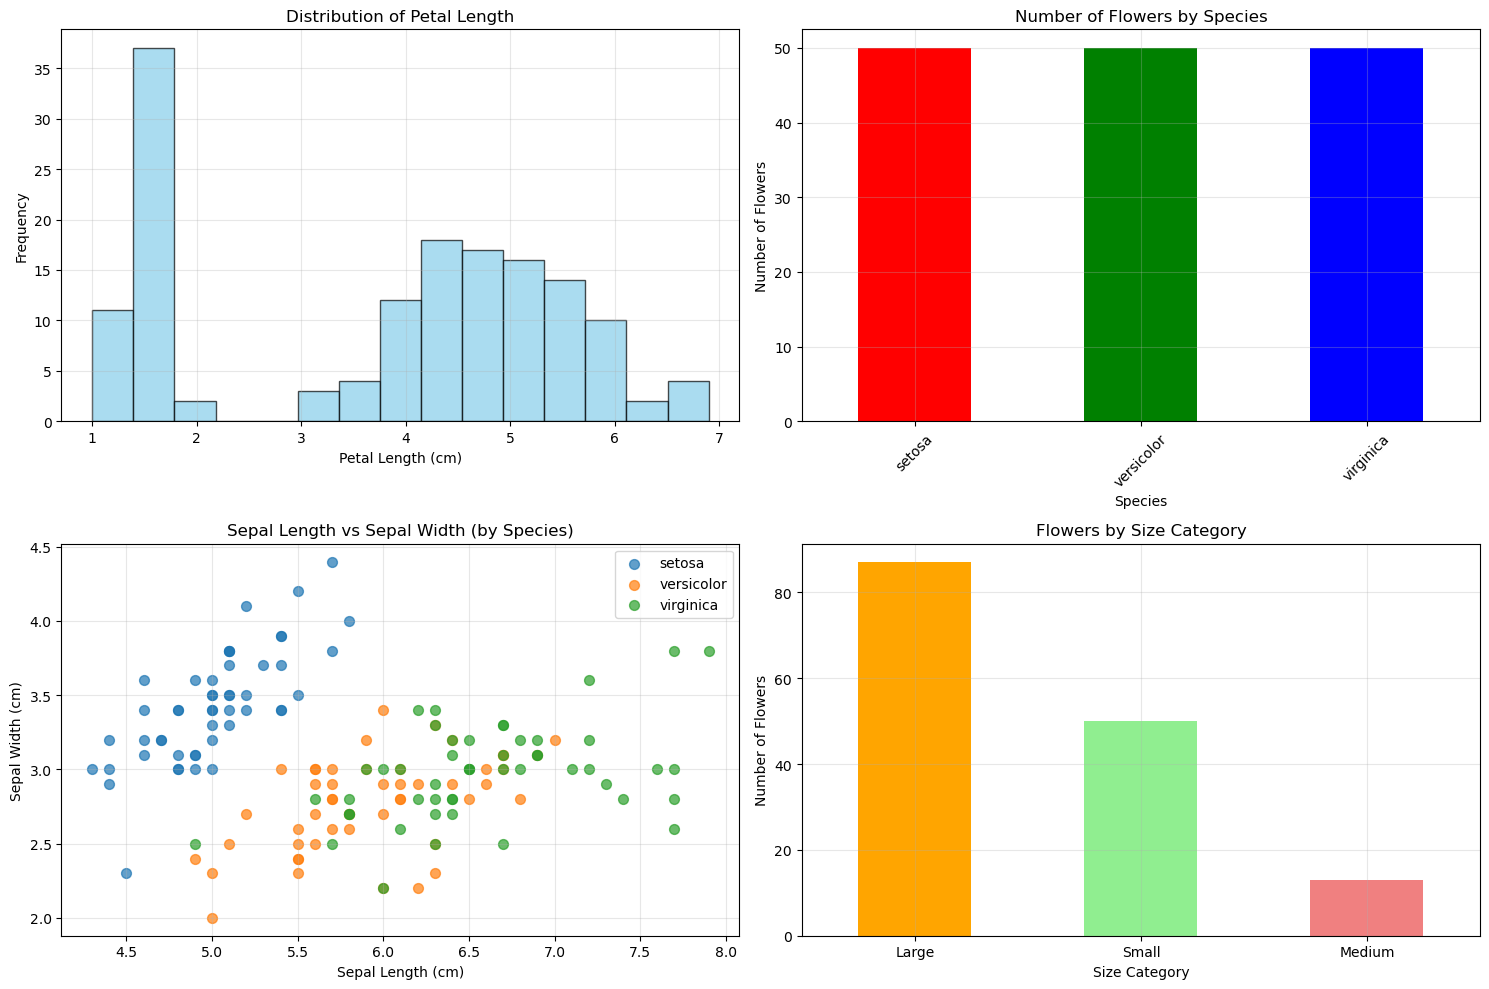

In [42]:
# Create a figure with subplots
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogram of petal length
axes[0, 0].hist(iris['petal_length'], bins=15, alpha=0.7, edgecolor='black', color='skyblue')
axes[0, 0].set_title('Distribution of Petal Length')
axes[0, 0].set_xlabel('Petal Length (cm)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# 2. Bar chart of flower count by species
species_counts = iris['species'].value_counts()
species_counts.plot(kind='bar', ax=axes[0, 1], color=['red', 'green', 'blue'])
axes[0, 1].set_title('Number of Flowers by Species')
axes[0, 1].set_xlabel('Species')
axes[0, 1].set_ylabel('Number of Flowers')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Scatter plot: sepal_length vs sepal_width
for species in iris['species'].unique():
    data = iris[iris['species'] == species]
    axes[1, 0].scatter(data['sepal_length'], data['sepal_width'], 
                      alpha=0.7, label=species, s=50)
axes[1, 0].set_title('Sepal Length vs Sepal Width (by Species)')
axes[1, 0].set_xlabel('Sepal Length (cm)')
axes[1, 0].set_ylabel('Sepal Width (cm)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Bar chart of size categories (if size_category column exists)
if 'size_category' in iris.columns:
    size_categories = iris['size_category'].value_counts()
    size_categories.plot(kind='bar', ax=axes[1, 1], color=['orange', 'lightgreen', 'lightcoral'])
    axes[1, 1].set_title('Flowers by Size Category')
    axes[1, 1].set_xlabel('Size Category')
    axes[1, 1].set_ylabel('Number of Flowers')
    axes[1, 1].tick_params(axis='x', rotation=0)
    axes[1, 1].grid(True, alpha=0.3)
else:
    # Alternative: petal length vs petal width scatter
    axes[1, 1].scatter(iris['petal_length'], iris['petal_width'], alpha=0.7, s=50)
    axes[1, 1].set_title('Petal Length vs Petal Width')
    axes[1, 1].set_xlabel('Petal Length (cm)')
    axes[1, 1].set_ylabel('Petal Width (cm)')
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Upon Completion:**

Execute all the cells, save and download the notebook and submit to Gradescope.


## Recap

In this section we got a first glimpse of the Pandas library.

We learned how to:

* load data from a CSV file
* inspect the data
* manipulate the data
* plot the data
* access rows and columns of the dataframe
* filter the data
* create new columns
* group the data
* compute the correlation between variables